# WeatherPy
----

### Analysis
(1) 

(2)

(3)

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set empty lists to store values and create count variables
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [5]:
# Set to imperial units 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# Print header before looping data
print("Beginning Data Retrieval")
print("-"*25)

# Loop over list of cities 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        # Update record and set numbers
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print(f"City '{city}' not found. Skipping...")

print("-"*25)
print("Data Retrieval Complete")
print("-"*25)


Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | hilo
City 'amderma' not found. Skipping...
Processing Record 4 of Set 1 | saint-joseph
Processing Record 5 of Set 1 | wagar
City 'garm' not found. Skipping...
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | flinders
City 'tsihombe' not found. Skipping...
Processing Record 9 of Set 1 | san cristobal
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | ushuaia
City 'halalo' not found. Skipping...
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | guerrero negro
Processing Record 14 of Set 1 | westport
Processing Record 15 of Set 1 | namatanai
Processing Record 16 of Set 1 | komsomolskiy
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | puro
Processing Record 19 of Set 1 | fortuna
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a pandas dataframe from the data retrieved from the API
weather_city_df = pd.DataFrame({
    "City" : city_name,
    "Cloud Coverage" : cloudiness,
    "City Country" : country,
    "City DateTime" : date,
    "Humidity" : humidity,
    "City Latitude" : lat,
    "City Longitude" : lng,
    "Max Temperature" : max_temp,
    "Wind Speed" : wind_speed
})

In [8]:
# Count data rows
weather_city_df.count()

City               563
Cloud Coverage     563
City Country       563
City DateTime      563
Humidity           563
City Latitude      563
City Longitude     563
Max Temperature    563
Wind Speed         563
dtype: int64

In [13]:
# Print the dataframe and drop duplicates
#weather_city_df.drop_duplicates()

In [14]:
# Print the dataframe
weather_city_df.head()

,City,Cloud Coverage,City Country,City DateTime,Humidity,City Latitude,City Longitude,Max Temperature,Wind Speed
0,Faanui,100,PF,1637639093,74,-16.4833,-151.7500,81.34,8.84
1,Tuktoyaktuk,40,CA,1637639093,77,69.4541,-133.0374,-5.80,10.36
2,Hilo,90,US,1637639094,96,19.7297,-155.0900,73.13,4.61
3,Saint-Joseph,17,RE,1637639094,67,-21.3667,55.6167,77.36,4.83
4,Wagar,18,SD,1637639095,75,16.1525,36.2032,71.24,10.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# Determine cities that have humidity greater than 100%
humidity_greater_100 = weather_city_df.loc[weather_city_df["Humidity"] > 100, :]

if humidity_greater_100.empty == True:
    print("There are no cities with humidity greater than 100%.")


There are no cities with humidity greater than 100%.


In [16]:
# Extract relevant fields from the data frame
# Becuase no cities have humidity greater than 100%, this step was skipped. 

# Export the City_Data into a csv
weather_city_df.to_csv("cities_weather_data.csv", index = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

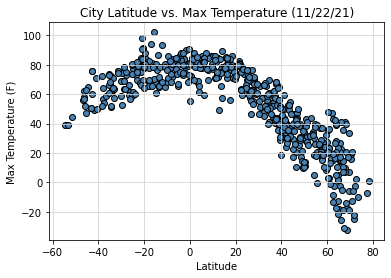

In [18]:
plt.scatter(weather_city_df["City Latitude"], weather_city_df["Max Temperature"], edgecolors="black", facecolors="steelblue")
plt.title("City Latitude vs. Max Temperature (11/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("Images/lat_maxtemp.png")


The Latitude vs. Max Temperature Plot above indicates that the temperature is higher South of the Equator at this time.

## Latitude vs. Humidity Plot

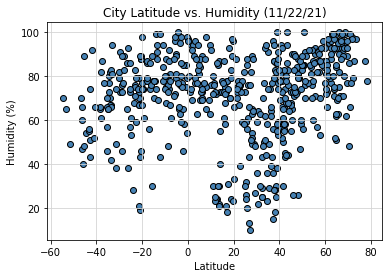

In [19]:
plt.scatter(weather_city_df["City Latitude"], weather_city_df["Humidity"], edgecolors="black", facecolors="steelblue")
plt.title("City Latitude vs. Humidity (11/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("Images/lat_humidity.png")


The Latitude vs. Humidity Plot above shows a cluster of humidity % levels North of the Equater (+40 latitude) at this time. At the same time, humidity levels are higher ranging above 60% in the North and South of the Equator.  

## Latitude vs. Cloudiness Plot

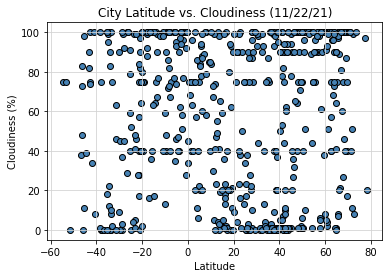

In [20]:
plt.scatter(weather_city_df["City Latitude"], weather_city_df["Cloud Coverage"], edgecolors="black", facecolors="steelblue")
plt.title("City Latitude vs. Cloudiness (11/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("Images/lat_cloudiness.png")


The Latitude vs. Cloudiness Plot above does not indicate a correlation at this time. 

## Latitude vs. Wind Speed Plot

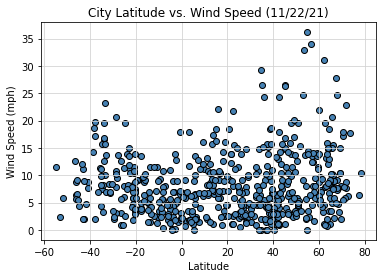

In [21]:
plt.scatter(weather_city_df["City Latitude"], weather_city_df["Wind Speed"], edgecolors="black", facecolors="steelblue")
plt.title("City Latitude vs. Wind Speed (11/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("Images/lat_windspeed.png")


The Latitude vs. Wind Speed Plot above shows that wind speed in the North and South of the Equator is below 10 mph for the majority at this time, with one outlier above 35 mph North of the Equator (+40 latitude). Generally, wind speeds are low during this time. 

## Linear Regression

In [46]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq, (a,b), fontsize=15, color="red")

In [47]:
# Create Northern and Southern Hemisphere DataFrames
n_hemisphere_df = weather_city_df.loc[weather_city_df["City Latitude"] >= 0]
s_hemisphere_df = weather_city_df.loc[weather_city_df["City Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7949953768414695


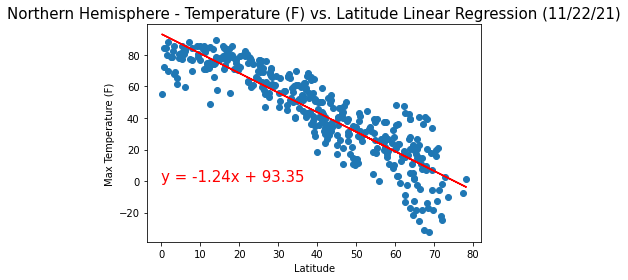

In [78]:
# Use created functions
eq = linear_regression(n_hemisphere_df["City Latitude"], n_hemisphere_df["Max Temperature"])
annotate(eq, 0, 0)

# Label plot
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude Linear Regression (11/22/21)", color="black", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the .png file
plt.savefig("Images/nhempispheretemp_lat.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4332683406636194


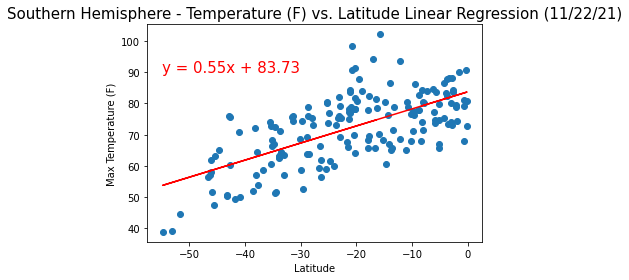

In [79]:
# Use created functions
eq = linear_regression(s_hemisphere_df["City Latitude"], s_hemisphere_df["Max Temperature"])
annotate(eq, -55, 90)

# Label plot
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude Linear Regression (11/22/21)", color="black", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the .png file
plt.savefig("Images/shempispheretemp_lat.png")


Northern and Southern Hemisphere - Temperature vs Latitude Linear Regression: 
The Northern Hemisphere Plot shows to have a strong correlation between maximum temperature and latitude while the Southern Hemisphere Plot shows a moderate positive correlation for predicting maximum temperatures per latitudes at a given time.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07871488369847451


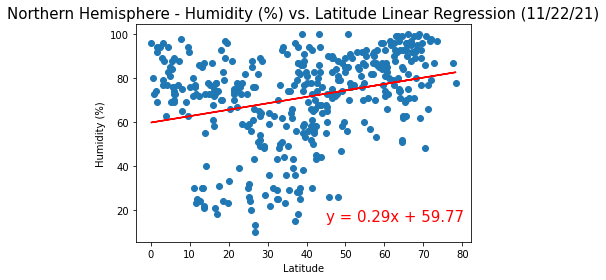

In [80]:
# Use created functions
eq = linear_regression(n_hemisphere_df["City Latitude"], n_hemisphere_df["Humidity"])
annotate(eq, 45, 15)

# Label plot
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (11/22/21)", color="black", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the .png file
plt.savefig("Images/nhempispherehumidity_lat.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09884424368498802


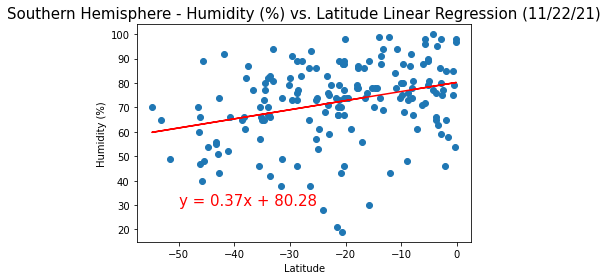

In [81]:
# Use created functions
eq = linear_regression(s_hemisphere_df["City Latitude"], s_hemisphere_df["Humidity"])
annotate(eq, -50, 30)

# Label plot
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (11/22/21)", color="black", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the .png file
plt.savefig("Images/shempispherehumidity_lat.png")


Northern and Southern Hemisphere - Humidity vs. Latitude Linear Regression:
For both the Northern and Southern Hemispheres, the R-squared linear regression model doesn't fit the data in predicting humidity percentage levels per latitude during this period. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03346977351233286


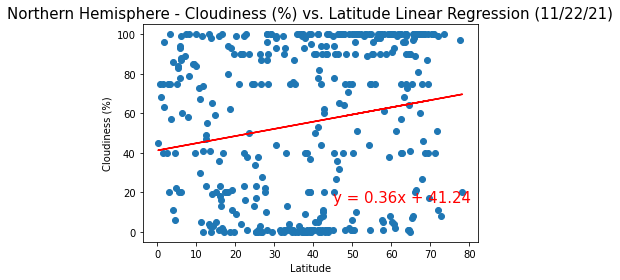

In [83]:
# Use created functions
eq = linear_regression(n_hemisphere_df["City Latitude"], n_hemisphere_df["Cloud Coverage"])
annotate(eq, 45, 15)

# Label plot
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (11/22/21)", color="black", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the .png file
plt.savefig("Images/nhempispherecloudiness_lat.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09085895581146158


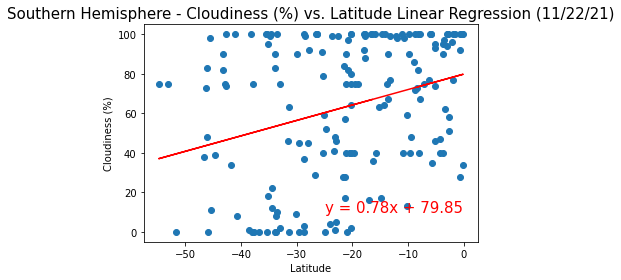

In [90]:
# Use created functions
eq = linear_regression(s_hemisphere_df["City Latitude"], s_hemisphere_df["Cloud Coverage"])
annotate(eq, -25, 10)

# Label plot
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (11/22/21)", color="black", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the .png file
plt.savefig("Images/shempispherecloudiness_lat.png")


Northern and Southern Hemisphere - Cloudiness vs. Latitude Linear Regression:
For both the Northern and Southern Hemispheres, the R-squared linear regression model doesn't fit the data in predicting cloudiness percentage levels per latitude during this period. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03181318129627553


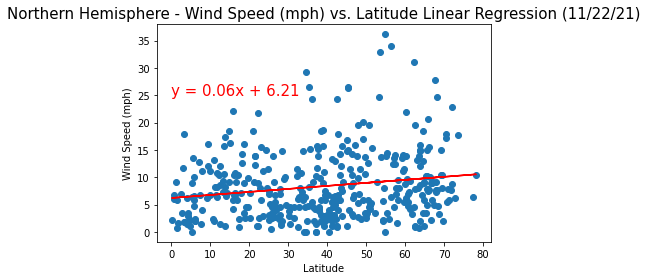

In [101]:
# Use created functions
eq = linear_regression(n_hemisphere_df["City Latitude"], n_hemisphere_df["Wind Speed"])
annotate(eq, 0, 25)

# Label plot
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (11/22/21)", color="black", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the .png file
plt.savefig("Images/nhempispherewindspeed_lat.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09487846183974305


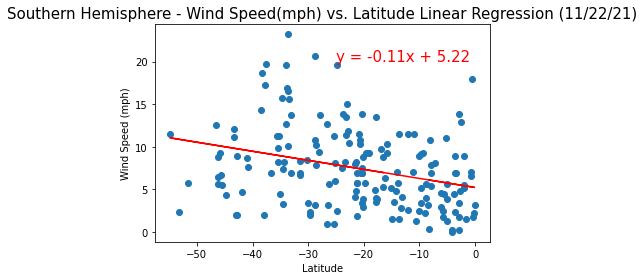

In [110]:
# Use created functions
eq = linear_regression(s_hemisphere_df["City Latitude"], s_hemisphere_df["Wind Speed"])
annotate(eq, -25, 20)

# Label plot
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression (11/22/21)", color="black", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the .png file
plt.savefig("Images/shempispherewindspeed_lat.png")


Northern and Southern Hemisphere - Wind Speed vs. Latitude Linear Regression:
For both the Northern and Southern Hemispheres, the R-squared linear regression model doesn't fit the data in predicting wind speed miles per hour levels per latitude during this period. 